# Principal Component Analysis

In [10]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
iris = pd.read_csv('Iris.csv')

In [11]:
# Drop the 'Id' column and the class label column 'Species'
X = iris.drop(['Id', 'Species'], axis=1)

# Ensure that all columns are numeric
print(X.dtypes)

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object


In [8]:
# Perform PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

In [14]:
# Print the PCA components and explained variance ratio
print("PCA components:\n", pca.components_)
print("Explained variance ratio:", pca.explained_variance_ratio_)

PCA components:
 [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]]
Explained variance ratio: [0.92461621 0.05301557 0.01718514 0.00518309]


In [17]:
# Create a DataFrame for the transformed data
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Add the species column back to the DataFrame for plotting
pca_df['Species'] = iris['Species']


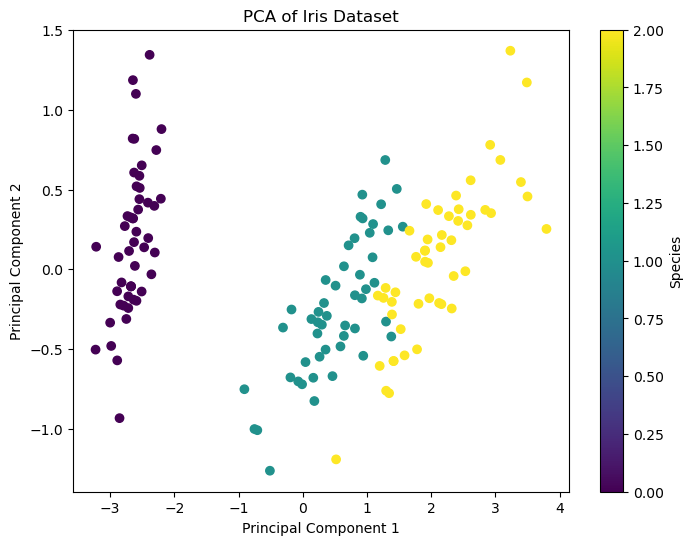

In [18]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Species'].astype('category').cat.codes, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar(scatter, label='Species')
plt.show()


In [19]:
print(pd.DataFrame(pca.components_,columns=X.columns))

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0       0.361590     -0.082269       0.856572      0.358844
1       0.656540      0.729712      -0.175767     -0.074706
2      -0.580997      0.596418       0.072524      0.549061
3       0.317255     -0.324094      -0.479719      0.751121


# Based on these coefficients, we can calculate the PCA components for our input DataFrame X:

In [20]:
pca_df=(pd.DataFrame(pca.components_,columns=X.columns))

# Let us calculate PC1 using coefficients that are generated
X['PC1'] = X['SepalLengthCm']* pca_df['SepalLengthCm'][0] + X['SepalWidthCm']*pca_df['SepalWidthCm'][0]+ X['PetalLengthCm']*pca_df['PetalLengthCm'][0]+X['PetalWidthCm']* pca_df['PetalWidthCm'][0]

# Let us calculate PC2
X['PC2'] = X['SepalLengthCm']* pca_df['SepalLengthCm'][1] + X['SepalWidthCm']*pca_df['SepalWidthCm'][1]+ X['PetalLengthCm']*pca_df['PetalLengthCm'][1]+X['PetalWidthCm']* pca_df['PetalWidthCm'][1]

#Let us calculate PC3
X['PC3'] = X['SepalLengthCm']* pca_df['SepalLengthCm'][2] + X['SepalWidthCm']*pca_df['SepalWidthCm'][2]+ X['PetalLengthCm']*pca_df['PetalLengthCm'][2]+X['PetalWidthCm']* pca_df['PetalWidthCm'][2]

# Let us calculate PC4
X['PC4'] = X['SepalLengthCm']* pca_df['SepalLengthCm'][3] + X['SepalWidthCm']*pca_df['SepalWidthCm'][3]+ X['PetalLengthCm']*pca_df['PetalLengthCm'][3]+X['PetalWidthCm']* pca_df['PetalWidthCm'][3]

In [21]:
print(X)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm       PC1  \
0              5.1           3.5            1.4           0.2  2.827136   
1              4.9           3.0            1.4           0.2  2.795952   
2              4.7           3.2            1.3           0.2  2.621524   
3              4.6           3.1            1.5           0.2  2.764906   
4              5.0           3.6            1.4           0.2  2.782750   
..             ...           ...            ...           ...       ...   
145            6.7           3.0            5.2           2.3  7.455360   
146            6.3           2.5            5.0           1.9  7.037007   
147            6.5           3.0            5.2           2.0  7.275389   
148            6.2           3.4            5.4           2.3  7.412972   
149            5.9           3.0            5.1           1.8  6.901009   

          PC2       PC3       PC4  
0    5.641331 -0.664277 -0.037715  
1    5.145167 -0.846287  0.

In [22]:
print(pca.explained_variance_ratio_)

[0.92461621 0.05301557 0.01718514 0.00518309]
